In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df = pd.read_csv('/content/kyphosis.csv')

In [53]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


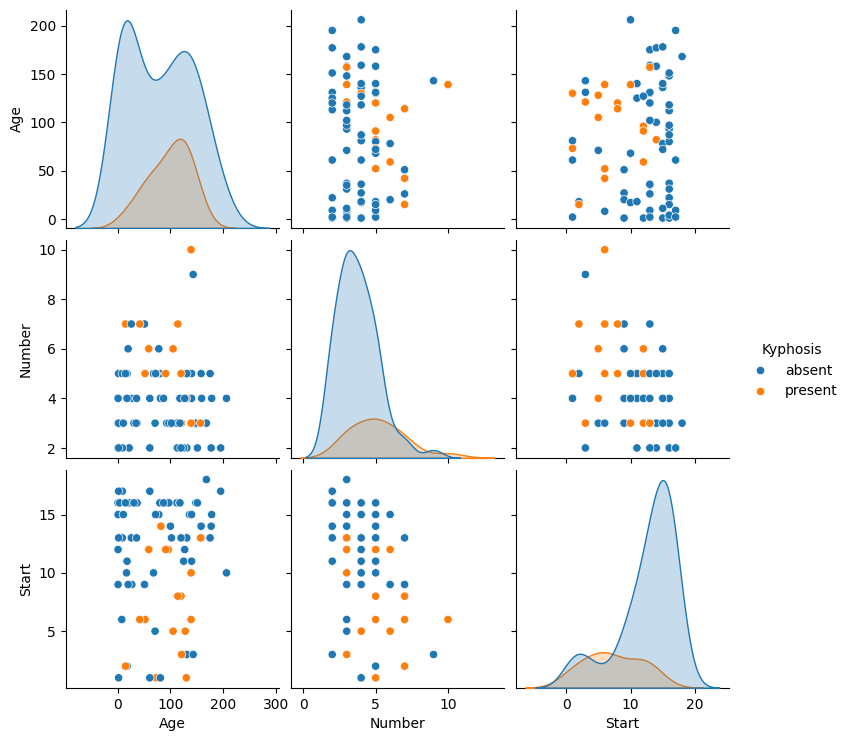

In [86]:
sns.pairplot(df, hue='Kyphosis')

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [90]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtree = DecisionTreeClassifier()

In [94]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
prediction = dtree.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(confusion_matrix(y_test, prediction))

[[13  4]
 [ 6  2]]


In [98]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rfc = RandomForestClassifier(n_estimators=200)

In [101]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [102]:
pred = rfc.predict(X_test)

In [103]:
print(confusion_matrix(y_test, pred))

[[17  0]
 [ 6  2]]


In [104]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [105]:
from IPython.display import Image
from io import StringIO

from sklearn.tree import export_graphviz
import pydot

In [106]:
features = list(df.columns[1:])

In [107]:
features

['Age', 'Number', 'Start']

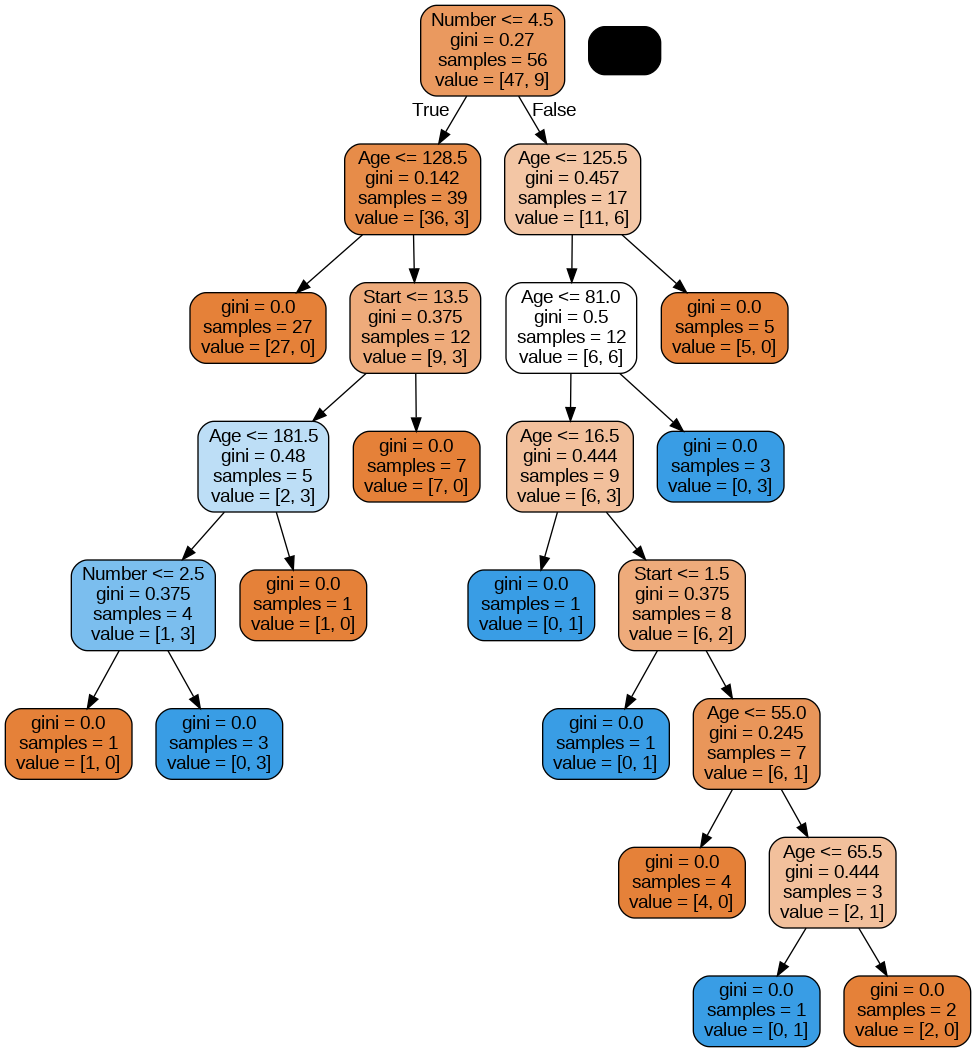

In [108]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True,
                rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())